Mehul Aneja (ma5550)<br/>
Intro Math Modeling<br/>
Final Project: Pendulum Dynamics<br/>
May 10, 2023

In [ ]:
Simple Pendulum:

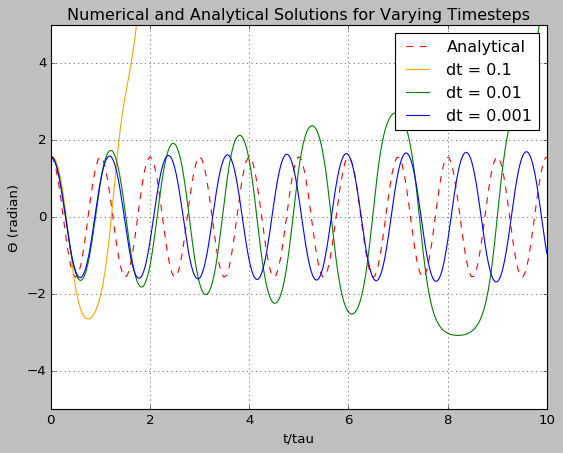

In [157]:
# For varying timesteps

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.1, 0.01, 0.001])
t = np.arange(0, 60, 0.1)
tau = 2*np.pi*np.sqrt(L/g)
L = 1
g = 9.81
colors=['orange','green','blue']

# Initial conditions
y1 = np.array([np.pi/2])
y2 = np.array([0])

# Analytical solution
Y_analytical = y1[0] * np.cos(np.sqrt(g/L) * t)
plt.plot(t/tau, Y_analytical, label='Analytical', linestyle='dashed', color='red')

# Euler method
for i in range(len(dt)):
    t = np.arange(0, 60, dt[i])
    y1 = np.array([np.pi/2])
    y2 = np.array([0])
    for j in range(len(t)-1):
        y1_next = y1[j] + dt[i] * y2[j]
        y2_next = y2[j] - (dt[i] * g / L * np.sin(y1[j]))
        y1 = np.append(y1, y1_next)
        y2 = np.append(y2, y2_next)
    plt.plot(t/tau, y1, label=f'dt = {dt[i]}', color=colors[i])

# Plotting
plt.xlabel('t/tau')
plt.ylabel('\u03f4 (radian)')
plt.title('Numerical and Analytical Solutions for Varying Timesteps')
plt.ylim([-5, 5])
plt.xlim([0, 10])
plt.grid('True')
plt.legend()
plt.style.use('classic') 
plt.show()

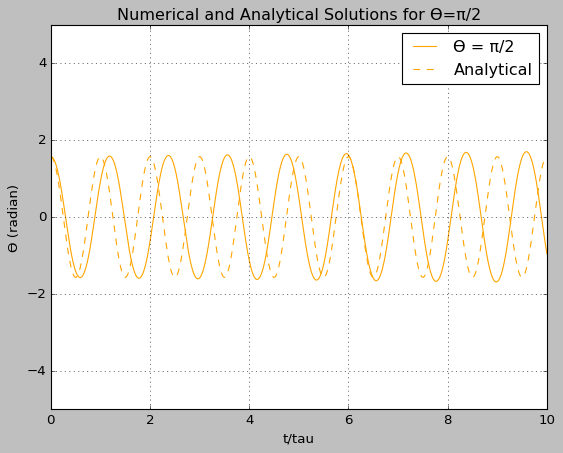

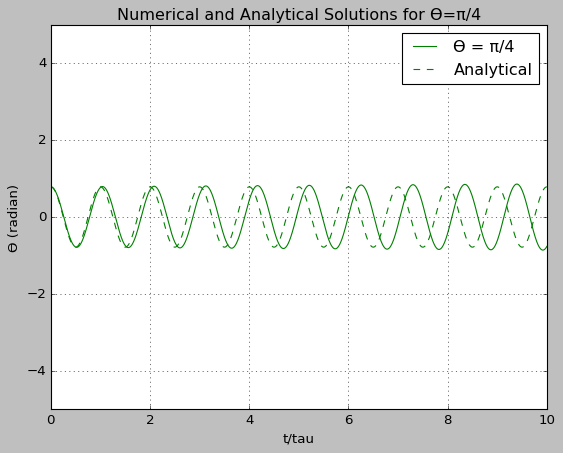

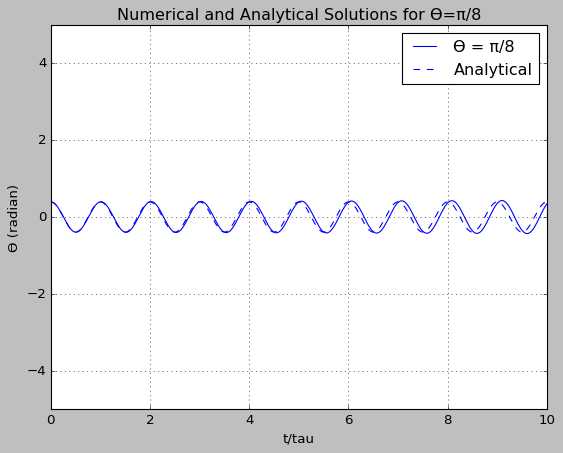

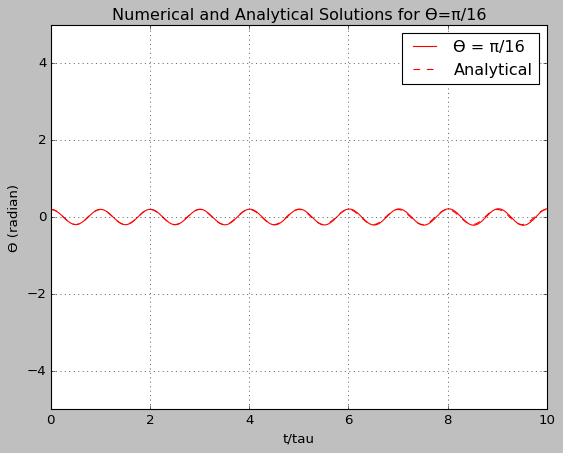

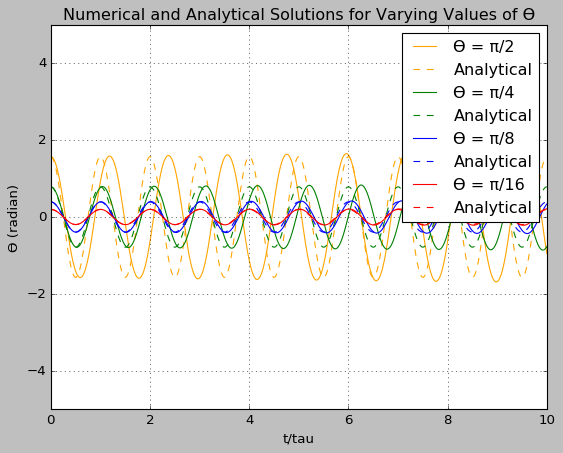

In [164]:
# For varying initial angular displacements

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.001])
t = np.arange(0, 60, dt)
tau = 2*np.pi*np.sqrt(L/g)
L = 1
g = 9.81
y1labels = ["π/2","π/4","π/8","π/16"]
colors=['orange','green','blue','red']

# Initial conditions
y1Initial = np.array([np.pi/2, np.pi/4, np.pi/8, np.pi/16])
y2Initial = np.array([0])

# Euler method
for i in range(len(y1Initial)):
    plt.figure(i)
    y1 = np.array([y1Initial[i]])
    y2 = np.array([0])
    for j in range(len(t)-1):
        y1_next = y1[j] + dt * y2[j]
        y2_next = y2[j] - (dt * g / L * np.sin(y1[j])) 
        y1 = np.append(y1, y1_next)
        y2 = np.append(y2, y2_next)

    plt.plot(t/tau, y1, label=f'\u03f4 = {y1labels[i]}',color=colors[i])
    
    yAnalytical = y1Initial[i] * np.cos(np.sqrt(g/L) * t)
    plt.plot(t/tau, yAnalytical, label='Analytical', linestyle='dashed',color=colors[i])

    plt.grid('True')
    plt.xlabel('t/tau')
    plt.ylabel('\u03f4 (radian)')
    plotTitle = "Numerical and Analytical Solutions for \u03f4=" + y1labels[i]
    plt.title(plotTitle)
    plt.ylim([-5, 5])
    plt.xlim([0, 10])
    plt.legend()

    plt.figure(4)
    plt.plot(t/tau, y1, label=f'\u03f4 = {y1labels[i]}',color=colors[i])
    plt.plot(t/tau, yAnalytical, label='Analytical', linestyle='dashed',color=colors[i])
    
# Plotting
plt.xlabel('t/tau')
plt.ylabel('\u03f4 (radian)')
plt.title('Numerical and Analytical Solutions for Varying Values of \u03f4')
plt.ylim([-5, 5])
plt.xlim([0, 10])
plt.grid('True')
plt.legend()
plt.style.use('classic')
plt.show()

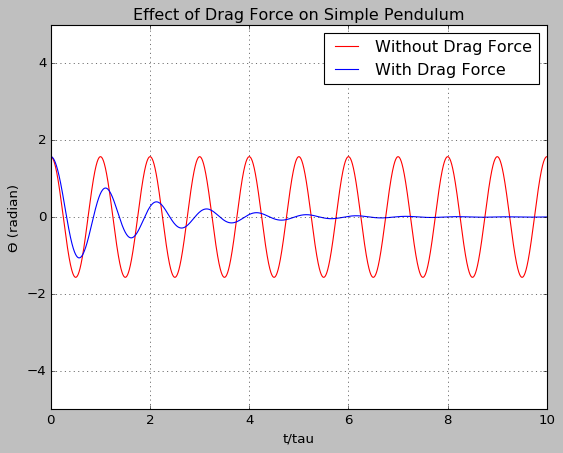

In [165]:
# For the effects of drag force

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.001])
t = np.arange(0, 60, dt)
tau = 2*np.pi*np.sqrt(L/g)
L = 1
g = 9.81

# Initial conditions
y1Initial = np.array([np.pi/2])
y2Initial = np.array([0])

# Drag Force
k = 0.02
A = np.pi * 0.1 * 0.1 # 10 cm radius

# Euler method
for i in range(len(y1Initial)):
    y1 = np.array([y1Initial[i]])
    y2 = np.array([0])
    for j in range(len(t)-1):
        y1_next = y1[j] + dt * y2[j]
        y2_next = y2[j] - (dt * g / L * np.sin(y1[j])) - k * A * y2[j]
        y1 = np.append(y1, y1_next)
        y2 = np.append(y2, y2_next)
    yAnalytical = y1Initial[0] * np.cos(np.sqrt(g/L) * t)
    
    # Plotting
    plt.plot(t/tau, yAnalytical, label='Without Drag Force',color='red')
    plt.plot(t/tau, y1, label="With Drag Force",color='blue')
    plt.grid('True')
    plt.xlabel('t/tau')
    plt.ylabel('\u03f4 (radian)')
    plt.title("Effect of Drag Force on Simple Pendulum")
    plt.ylim([-5, 5])
    plt.xlim([0, 10])
    plt.legend()
plt.style.use('classic')    
plt.show()

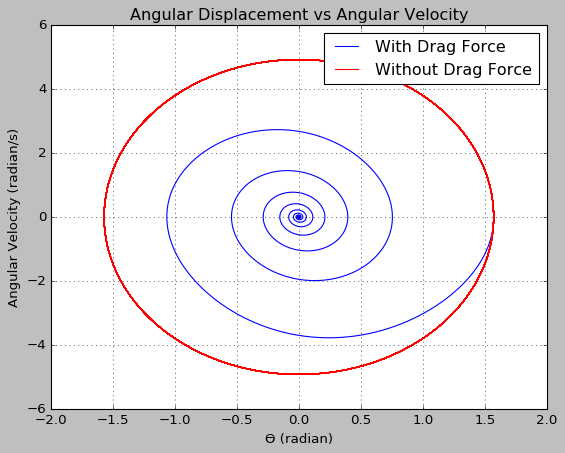

In [166]:
# For angular displacement vs angular velocity

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.001])
t = np.arange(0, 60, dt)
L = 1
g = 9.81

# Initial conditions
theta_start = np.array([np.pi/2])
theta_dot_start = np.array([0])

# Drag Force
k = 0.02
A = np.pi * 0.1 * 0.1 # 10 cm radius

# Initialize theta and theta_dot
theta = np.array([theta_start[0]])
theta_dot = np.array([theta_dot_start[0]])

# Euler method
for j in range(len(t)-1):
    theta_next = theta[j] + dt * theta_dot[j]
    theta_dot_next = theta_dot[j] - (dt * (g/L) * np.sin(theta[j])) - k * A * theta_dot[j]
    theta = np.append(theta, theta_next)
    theta_dot = np.append(theta_dot, theta_dot_next)
yAnalytical = theta_start[0] * np.cos(np.sqrt(g/L) * t)
ydot_Analytical = theta_start[0] * np.sqrt(g/L) * np.sin(np.sqrt(g/L) * t)

# Plotting
plt.plot(theta, theta_dot, label='With Drag Force',color='blue')
plt.plot(yAnalytical, ydot_Analytical,label='Without Drag Force',color='red')
plt.grid(True)
plt.xlabel('\u03f4 (radian)')
plt.ylabel('Angular Velocity (radian/s)')
plt.title('Angular Displacement vs Angular Velocity')
plt.legend()
plt.ylim([-6, 6])
plt.xlim([-2, 2])
plt.style.use('classic')
plt.show()

Physical Pendulum

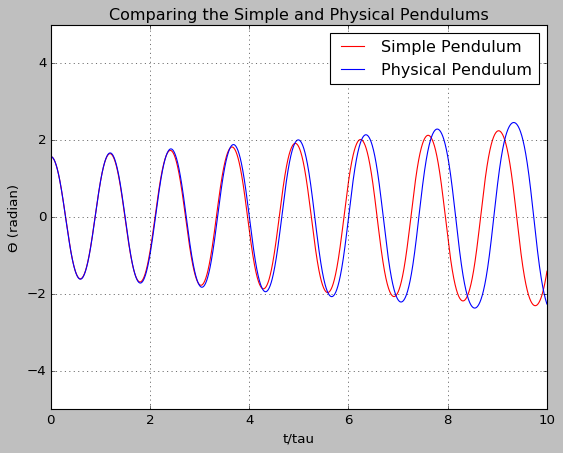

In [167]:
# Comparing the simple and the physical pendulum

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.005])
t = np.arange(0, 60, dt)
tau = 2*np.pi*np.sqrt((2*L)/(3*g))
tausimple = 2*np.pi*np.sqrt(L/g)
L = 1
g = 9.81

# Initial conditions
y1 = np.array([np.pi/2])
y2 = np.array([0])

# Euler method
for i in range(len(dt)):
    t = np.arange(0, 60, dt[i])
    y1 = np.array([np.pi/2])
    y2 = np.array([0])
    tsim = np.arange(0, 60, dt[i])
    y1sim = np.array([np.pi/2])
    y2sim = np.array([0])
    for j in range(len(t)-1):
        y1_next = y1[j] + dt[i] * y2[j]
        y2_next = y2[j] - (dt[i] * 3*g /2*L * np.sin(y1[j]))
        y1 = np.append(y1, y1_next)
        y2 = np.append(y2, y2_next)
        y1_nextsim = y1sim[j] + dt[i] * y2sim[j]
        y2_nextsim = y2sim[j] - (dt[i] * g / L * np.sin(y1sim[j]))
        y1sim = np.append(y1sim, y1_nextsim)
        y2sim = np.append(y2sim, y2_nextsim)

    # Plotting
    plt.plot(t/tausimple, y1sim, label='Simple Pendulum',color='red')
    plt.plot(t/tau, y1, label='Physical Pendulum',color='blue')
plt.ylim([-5, 5])
plt.xlim([0, 10])
plt.grid('True')
plt.xlabel('t/tau')
plt.ylabel('\u03f4 (radian)')
plt.title('Comparing the Simple and Physical Pendulums')
plt.legend()
plt.style.use('classic')
plt.show()

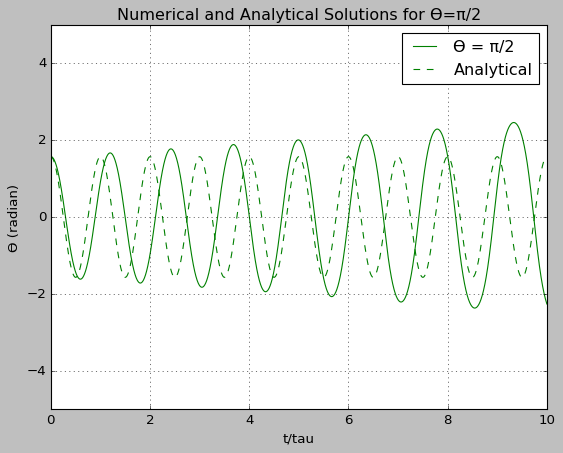

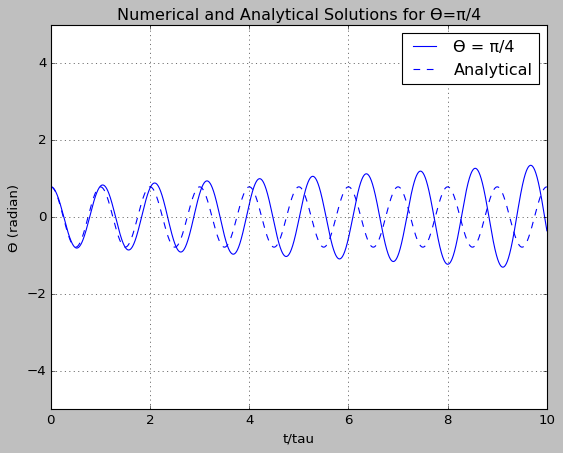

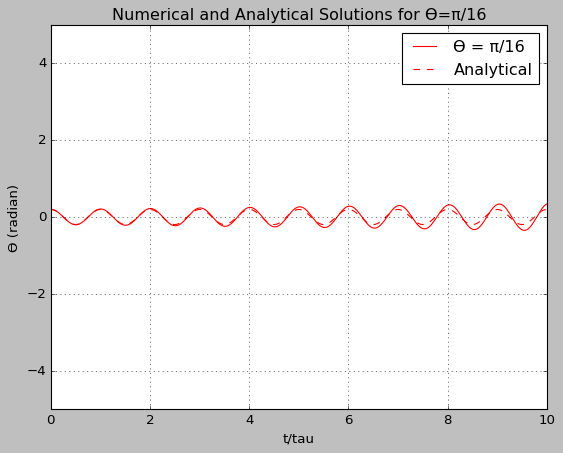

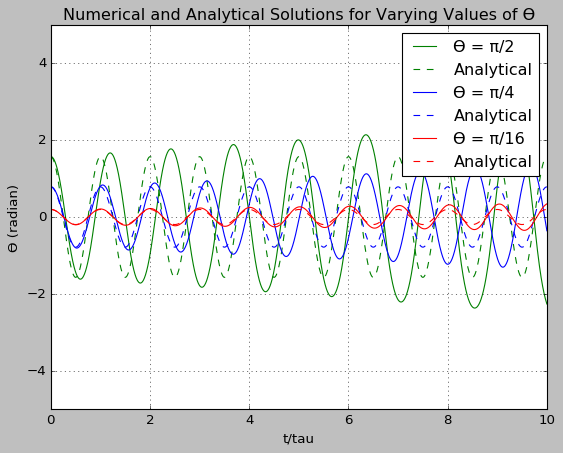

In [174]:
# For varying initial angular displacements

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.005])
t = np.arange(0, 60, dt)
tau = 2*np.pi*np.sqrt((2*L)/(3*g))
L = 1
g = 9.81
y1labels = ["π/2","π/4","π/16"]
colors=['green','blue','red']

# Initial conditions
y1Initial = np.array([np.pi/2, np.pi/4, np.pi/16])
y2Initial = np.array([0])

# Euler method
for i in range(len(y1Initial)):
    plt.figure(i)
    y1 = np.array([y1Initial[i]])
    y2 = np.array([0])
    for j in range(len(t)-1):
        y1_next = y1[j] + dt * y2[j]
        y2_next = y2[j] - (dt * 3*g / 2*L * np.sin(y1[j])) 
        y1 = np.append(y1, y1_next)
        y2 = np.append(y2, y2_next)
    y1Analytical = y1Initial[i] * np.cos(np.sqrt(3*g/2*L) * t)
    
    # Plotting
    plt.plot(t/tau, y1, label=f'\u03f4 = {y1labels[i]}',color=colors[i])
    plt.plot(t/tau, y1Analytical, label='Analytical', linestyle='dashed',color=colors[i])
    plt.grid('True')
    plt.xlabel('t/tau')
    plt.ylabel('\u03f4 (radian)')
    plotTitle = "Numerical and Analytical Solutions for \u03f4=" + y1labels[i]
    plt.title(plotTitle)
    plt.ylim([-5, 5])
    plt.xlim([0, 10])
    plt.legend()
    
    plt.figure(3)
    plt.plot(t/tau, y1, label=f'\u03f4 = {y1labels[i]}',color=colors[i])
    plt.plot(t/tau, y1Analytical, label='Analytical', linestyle='dashed',color=colors[i])
    
plt.xlabel('t/tau')
plt.ylabel('\u03f4 (radian)')
plt.title('Numerical and Analytical Solutions for Varying Values of \u03f4')
plt.ylim([-5, 5])
plt.xlim([0, 10])
plt.grid('True')
plt.legend()
plt.style.use('classic')
plt.show()

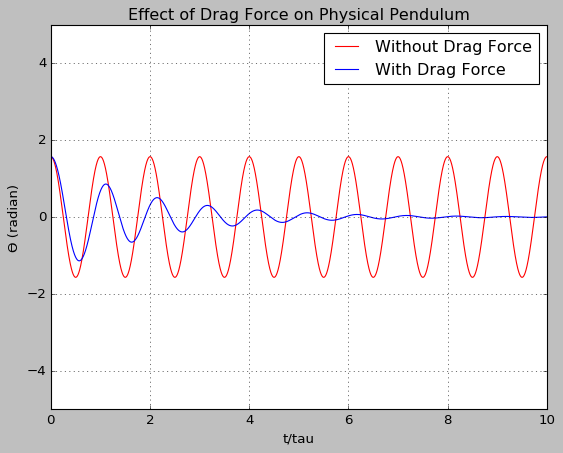

In [175]:
# For the effects of drag force

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.001])
t = np.arange(0, 60, dt)
tau = 2*np.pi*np.sqrt((2*L)/(3*g))
L = 1
g = 9.81

# Initial conditions
y1Initial = np.array([np.pi/2])
y2Initial = np.array([0])

# Drag Force
k = 0.02
A = np.pi * 0.1 * 0.1 # 10 cm radius

# Euler method
for i in range(len(y1Initial)):
    y1 = np.array([y1Initial[i]])
    y2 = np.array([0])
    for j in range(len(t)-1):
        y1_next = y1[j] + dt * y2[j]
        y2_next = y2[j] - (dt * 3*g / 2*L * np.sin(y1[j])) - y2[j] * k * A
        y1 = np.append(y1, y1_next)
        y2 = np.append(y2, y2_next)
    y1Analytical = y1Initial[0] * np.cos(np.sqrt(3*g/2*L) * t)
    
    # Plotting
    plt.plot(t/tau, y1Analytical, color= 'red',label='Without Drag Force')
    plt.plot(t/tau, y1,color= 'blue', label="With Drag Force")
    plt.grid('True')
    plt.xlabel('t/tau')
    plt.ylabel('\u03f4 (radian)')
    plt.title("Effect of Drag Force on Physical Pendulum")
    plt.ylim([-5, 5])
    plt.xlim([0, 10])
    plt.legend(loc='upper right')
plt.style.use('classic')
plt.show()

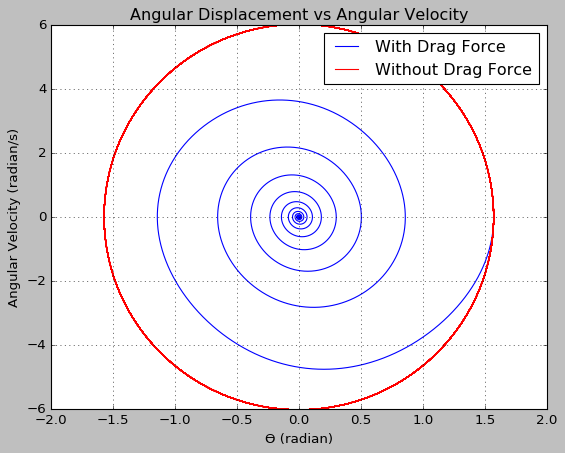

In [176]:
# For angular displacement vs angular velocity

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Timestep, time array, and constants
dt = np.array([0.001])
t = np.arange(0, 60, dt)
L = 1
g = 9.81

# initial conditions
theta_start = np.array([np.pi/2])
theta_dot_start = np.array([0])

# Drag Force
k = 0.02
A = np.pi * 0.1 * 0.1 # 10 cm radius

# Initialize theta and theta_dot
theta = np.array([theta_start[0]])
theta_dot = np.array([theta_dot_start[0]])

# Euler method
for j in range(len(t)-1):
    theta_next = theta[j] + dt * theta_dot[j]
    theta_dot_next = theta_dot[j] - (dt * (3*g/2*L) * np.sin(theta[j]) + k * A * theta_dot[j])
    theta = np.append(theta, theta_next)
    theta_dot = np.append(theta_dot, theta_dot_next)
yAnalytical = theta_start[0] * np.cos(np.sqrt(3*g/2*L) * t)
ydot_analytical = theta_start[0] * np.sqrt(3*g/2*L) * np.sin(np.sqrt(3*g/2*L) * t)

# Plotting
plt.plot(theta, theta_dot, label='With Drag Force',color='blue')
plt.plot(yAnalytical, ydot_analytical,label='Without Drag Force',color='red')
plt.grid(True)
plt.xlabel('\u03f4 (radian)')
plt.ylabel('Angular Velocity (radian/s)')
plt.title('Angular Displacement vs Angular Velocity')
plt.legend()
plt.ylim([-6, 6])
plt.xlim([-2, 2])
plt.style.use('classic')
plt.show()